# Name- Bhanu Katoch

# Exp.- Coin-Toss

# Statistical Mechanics 

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.integrate as sc
import pandas as pd
import itertools as it

In [2]:
def fact(n):
	nx = 1
	for i in range(1,n+1):
		nx = nx*i
	return nx
fact(4)

24

In [3]:
def C_n(n,x):
	return fact(n)/(fact(x)*fact(n-x))
C_n(4,2)

6.0

In [4]:
#to get microstate
def micr(n):
	a=[]

	for x in it.product(['H','T'],repeat=n):
		a.append(list(x))

	#print(a)

	for i in range(2**n):
		c=0
		for j in range(n):
			if a[i][j]=='H':
				c+=1
			if j==n-1:
				a[i].append(c)

	main=[]

	for i in range(n+1):
		xx=[]
		for j in range(2**n):
			if a[j][n]==i:
				main.append(a[j][:n])
	return main
micr(3)

[['T', 'T', 'T'],
 ['H', 'T', 'T'],
 ['T', 'H', 'T'],
 ['T', 'T', 'H'],
 ['H', 'H', 'T'],
 ['H', 'T', 'H'],
 ['T', 'H', 'H'],
 ['H', 'H', 'H']]

In [5]:
#to get spacing in different arrays
def col(n,b):
	x=[]
	for i in range(n+1):
		for j in range(int(C_n(n,i))):
			if j==0:
				x.append(b[i])
			else:
				x.append('')
	return x
sample=[1,2,3,4]
col(3,sample)

[1, 2, '', '', 3, '', '', 4]

In [6]:
def coin_t(n):
	Ms = []
	N2 = []
	for i in range(n+1):
		N2.append(i)
		Ms.append(i+1)
	N1=[]
	for j in range(n,-1,-1):
		N1.append(j)

	#print(N1)
	#print(Ms)
	#print(N2)

	Tp=[]
	sm=0.0
	for i in range(n+1):
		Tp.append(C_n(n,N1[i]))
		sm+=C_n(n,N1[i])
	
	#print(sm)
	#print(Tp)
	Ap=[]
	for i in range(n+1):
		Ap.append(Tp[i]/sm)
	#print(Ap)
	
	#df=pd.DataFrame({'Macrostate number':Msc,'Head':N2c,'Tail':N1c,'TP':Tpc,'AP':Apc,'Microstate':micr(n)})
	return N1,N2,Ms,Tp,Ap



In [7]:
def dt(n):
    assert n<=5
    data = coin_t(n)
    Msc=col(n,data[2])
    N1c=col(n,data[0])
    N2c=col(n,data[1])
    Tpc=col(n,data[3])
    Apc=col(n,data[4])
    df = pd.DataFrame({'Macrostate number':Msc,'Head':N2c,'Tail':N1c,'TP':Tpc,'AP':Apc,'Microstate':micr(n)})
    print(df.loc[:,['Macrostate number','Head','Tail','Microstate','TP','AP']])
dt(4)

   Macrostate number Head Tail    Microstate   TP      AP
0                  1    0    4  [T, T, T, T]  1.0  0.0625
1                  2    1    3  [H, T, T, T]  4.0    0.25
2                               [T, H, T, T]             
3                               [T, T, H, T]             
4                               [T, T, T, H]             
5                  3    2    2  [H, H, T, T]  6.0   0.375
6                               [H, T, H, T]             
7                               [H, T, T, H]             
8                               [T, H, H, T]             
9                               [T, H, T, H]             
10                              [T, T, H, H]             
11                 4    3    1  [H, H, H, T]  4.0    0.25
12                              [H, H, T, H]             
13                              [H, T, H, H]             
14                              [T, H, H, H]             
15                 5    4    0  [H, H, H, H]  1.0  0.0625


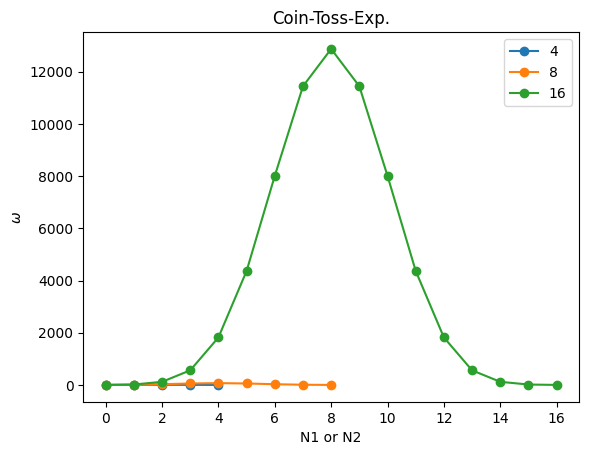

In [8]:
#print(sim3[5])
#def pt():
smn=[4,8,16]
simp=[coin_t(smn[0]),coin_t(smn[1]),coin_t(smn[2])]

for i in range(len(simp)):
    plt.plot(simp[i][0],simp[i][3],marker='o',label=str(smn[i]))
    plt.legend(loc='best')
    plt.xlabel('N1 or N2')
    plt.ylabel('$\omega$')
    plt.title('Coin-Toss-Exp.')
plt.show()

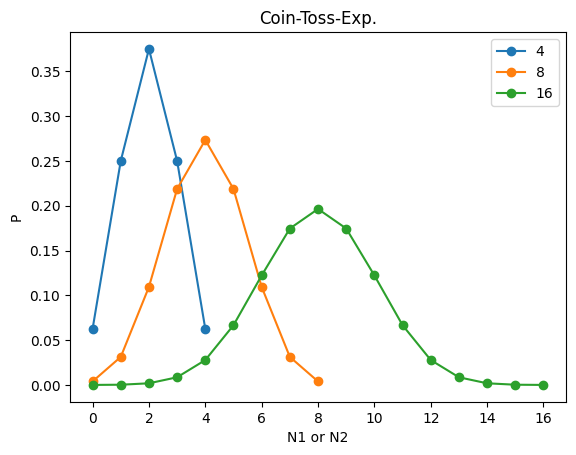

In [18]:
#actual probability
for i in range(len(simp)):
    plt.plot(simp[i][0],simp[i][4],marker='o',label=str(smn[i]))
    plt.legend(loc='best')
    plt.xlabel('N1 or N2')
    plt.ylabel('P')
    plt.title('Coin-Toss-Exp.')
plt.show()